In [1]:
import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import cv2
import yaml
import glob, os
import loadcoraldata_utils as coralutils
import json
import importlib
from NeMO_generator import NeMOImageGenerator, ImageSetLoader
from osgeo import gdal

from matplotlib import colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])

cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])
cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])

mosaics = [2]
N_images = 1000

output_trainpath = '../Images/CiciaDANN_Target_256/'
output_trainrefpath = '../Images/CiciaDANN_TargetRef_256/'
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainpath)
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainrefpath)
output_trainfilename = 'rastertrain.txt'

for mosaic_count in mosaics:
    print("Mosaic Count: ", mosaic_count)
    imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
    truthpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
    
    Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
    Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
    Fiji.Consolidate_classes(newclassdict=json_data["VedConsolidated_ClassDict"], transferdict=json_data["L32VedConsolidated_Dict"])
    
    print("Outputing Training...")
    Fiji.export_segmentation_map(output_trainpath, output_trainrefpath, output_trainfilename, image_size = 256, 
                                 N = N_images, lastchannelremove = False, subdir=True, cont=False, consolidated = True, 
                                 classestoexport=['Coral'], mosaic_mean = 100, mosaic_std = 100)
    print("\n")


Mosaic Count:  2
[[[27 27 27]
  [27 27 27]
  [27 27 27]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[27 27 27]
  [27 27 27]
  [27 27 27]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[27 27 27]
  [27 27 27]
  [27 27 27]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 ...

 [[39 39 39]
  [39 39 39]
  [39 39 39]
  ...
  [39 39 39]
  [39 39 39]
  [39 39 39]]

 [[39 39 39]
  [39 39 39]
  [39 39 39]
  ...
  [39 39 39]
  [39 39 39]
  [39 39 39]]

 [[39 39 39]
  [39 39 39]
  [39 39 39]
  ...
  [39 39 39]
  [39 39 39]
  [39 39 39]]]
Warning! Truth image not in expected format... loading directly whole image using cv2...


./utils/loadcoraldata_utils.py:224: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


Outputing Training...
1 of 1 total classes found and saved




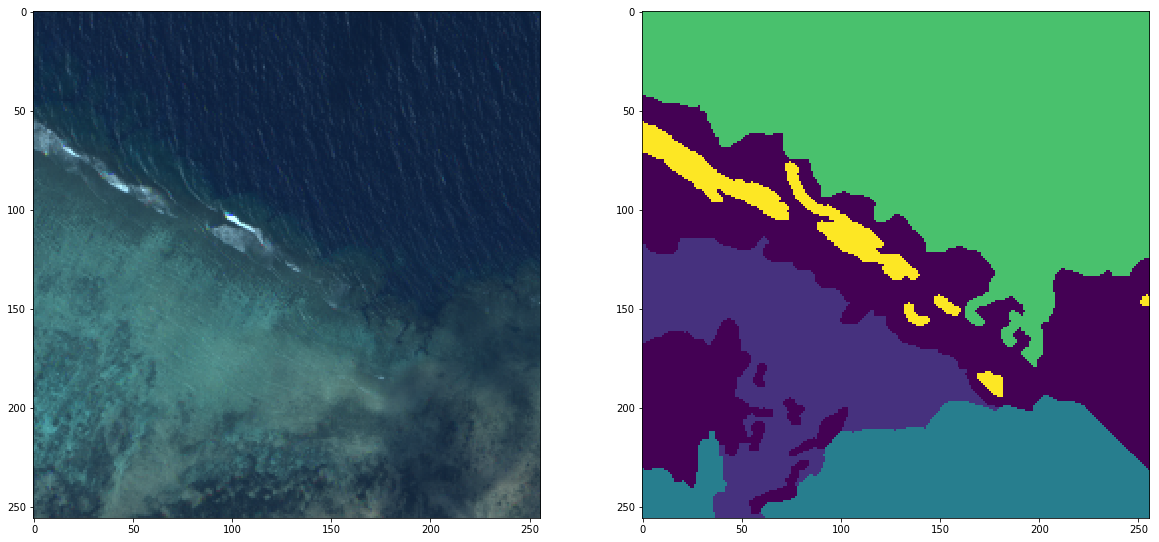

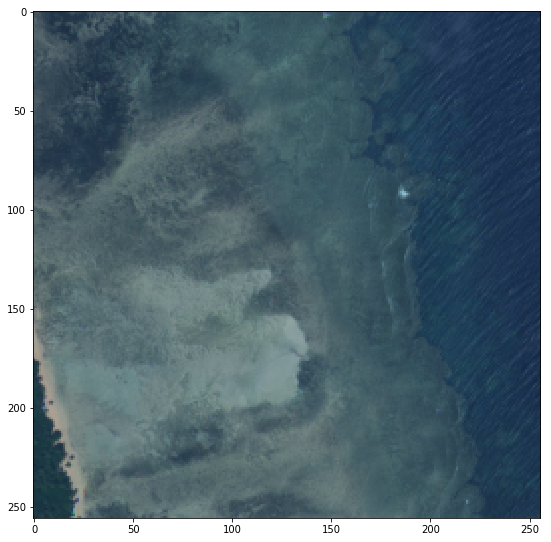

In [16]:
filepath = "/home/asli/NeMO-Test/NeMO-NET/CNN/Generator_Outputs/_sourceimg_0_0_21.tif"
truthpath = "/home/asli/NeMO-Test/NeMO-NET/CNN/Generator_Outputs/_labelimg_0_21.png"
Fijitest = coralutils.CoralData(filepath, load_type="raster")
truth = cv2.imread(truthpath,cv2.IMREAD_GRAYSCALE)

patch_R = 100*Fijitest.image[:,:,2]+100
patch_G = 100*Fijitest.image[:,:,1]+100
patch_B = 100*Fijitest.image[:,:,0]+100
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255

Fiji_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB[Fiji_RGB > 255] = 255

fig = plt.figure(1,figsize=(20,20))
ax = plt.subplot(1,2,1)
ax.imshow(Fiji_RGB)
ax = plt.subplot(1,2,2)
ax.imshow(truth)
plt.show()

filepath2 = "/home/asli/NeMO-Test/NeMO-NET/CNN/Generator_Outputs/_targetimg_0_0_222.tif"
Fijitest2 = coralutils.CoralData(filepath2, load_type="raster")
patch_R = 100*Fijitest2.image[:,:,2]+100
patch_G = 100*Fijitest2.image[:,:,1]+100
patch_B = 100*Fijitest2.image[:,:,0]+100
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255

Fiji_RGB2 = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB2[Fiji_RGB2 > 255] = 255

fig = plt.figure(2, figsize=(20,20))
ax = plt.subplot(1,2,1)
ax.imshow(Fiji_RGB2)
plt.show()